# Multiple Linear Regression

### Project Objective: - Perform multiple linear regression analysis to predict price of Toyota Corolla.

#### Brief Overview: - 

#### Libraries Used: - 

###### 1. Pandas, Numpy - For Data Manipulation
###### 2. Matplotlib, Seaborn - For Data Visualization
###### 3. Statsmodels - For Regression Analysis
###### 4. Scikit-learn - For Model Building and Evaluation

#### Steps for building the prediction model: - 

###### 1. Performed exploratory data analysis to identify missing values, duplicate records, outliers and feature relationships with each other.
###### 2. Removed unnecessary features.
###### 3. Built 3 different Multiple Linear Regression models using statsmodels library.
###### 4. Evaluated model's performance on metrics like R-Square values. 
###### 5. Utilized Residual plot to identify non-linearity,heteroscedasticity and outliers in the model.
###### 6. Further used Lasso-Ridge regularization techniques to observe any improvements in model's performance. 

#### Result: - The final model achieved R-square value of 0.8641, indicating a robust regression model. 

## Importing libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading dataset

In [14]:
df = pd.read_csv('ToyotaCorolla - MLR.csv')
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


#### Dataset Description: 

##### 1. Age - Age in years
##### 2. KM - Accumulated kilometers on odometer
##### 3. Fuel_Type - Fuel Type(Petrol, Diesel, CNG)
##### 4. HP - Horse Power
##### 5. Automatic - Automatic Gears(Yes=1, No=0)
##### 6. cc - Cylinder volume in cubic centimeters
##### 7. Doors - Number of Doors
##### 8. Cylinders - Number of cylinders
##### 9. Gears - Number of gears
##### 10. Weight - Weight in kilograms
##### 11. Price -> 'Target Variable' - Offer price in EURO's

## Exploratory Data Analysis

In [17]:
df.shape

(1436, 11)

In [18]:
df.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

In [19]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [20]:
# There are no missing/null values in the dataset.

In [21]:
df.duplicated().sum()

1

In [22]:
# There is only 1 duplicate record in the dataset which can be removed from further analysis. 

In [23]:
df.drop_duplicates(inplace=True)

In [24]:
df.duplicated().sum()

0

In [25]:
df.shape

(1435, 11)

In [26]:
# Resetting the index after duplicate removal

df = df.reset_index(drop=True)
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1431,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1432,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1433,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [27]:
# Let's check unique values of Fuel_Type, Cylinders and Doors.

In [28]:
df.Fuel_Type.value_counts()

Fuel_Type
Petrol    1264
Diesel     154
CNG         17
Name: count, dtype: int64

In [29]:
df.Cylinders.nunique()

1

In [30]:
df.Doors.nunique()

4

In [31]:
# As number of doors do not significantly affect pricing and only 1 unique value of 'Cylinders' -> Drop these columns

In [32]:
df.drop(columns=['Doors','Cylinders'],inplace=True)
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,5,1165
1,13750,23,72937,Diesel,90,0,2000,5,1165
2,13950,24,41711,Diesel,90,0,2000,5,1165
3,14950,26,48000,Diesel,90,0,2000,5,1165
4,13750,30,38500,Diesel,90,0,2000,5,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,Petrol,86,0,1300,5,1025
1431,10845,72,19000,Petrol,86,0,1300,5,1015
1432,8500,71,17016,Petrol,86,0,1300,5,1015
1433,7250,70,16916,Petrol,86,0,1300,5,1015


## Data Visualization

In [34]:
# Checking outliers in the dataset

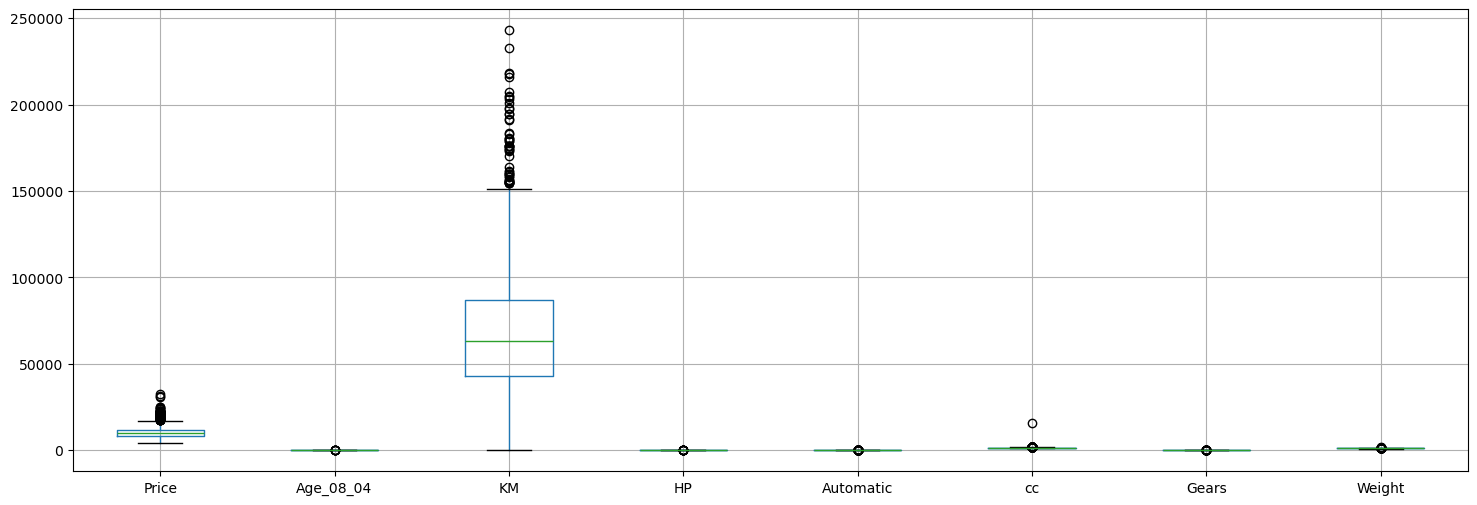

In [35]:
df.boxplot(figsize=(18,6))
plt.show()

In [276]:
# Features -> 'Price','KM','cc' have a positively skewed data as the outliers are above the upper whisker in these boxplots. 
# Positively skewed data has a longer tail on the right side of the distribution, meaning there are more extreme values on the higher end 
# and thus more outliers above the upper whisker. 
# Rest all other features show some outliers as well. Thus, it is better to impute them using IQR method. 

In [37]:
def outlier_detection(df,columns): 
    for col in columns:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        iqr=Q3-Q1
        lower=Q1-1.5*iqr
        upper=Q3+1.5*iqr
        df[col]=np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))
    return df

In [38]:
outlier_detection(df,['Price','Age_08_04','KM','HP','Automatic','cc','Gears','Weight'])

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Gears,Weight
0,13500.0,23.0,46986.0,Diesel,90.0,0.0,1900.0,5.0,1152.5
1,13750.0,23.0,72937.0,Diesel,90.0,0.0,1900.0,5.0,1152.5
2,13950.0,24.0,41711.0,Diesel,90.0,0.0,1900.0,5.0,1152.5
3,14950.0,26.0,48000.0,Diesel,90.0,0.0,1900.0,5.0,1152.5
4,13750.0,30.0,38500.0,Diesel,90.0,0.0,1900.0,5.0,1152.5
...,...,...,...,...,...,...,...,...,...
1430,7500.0,69.0,20544.0,Petrol,86.0,0.0,1300.0,5.0,1025.0
1431,10845.0,72.0,19000.0,Petrol,86.0,0.0,1300.0,5.0,1015.0
1432,8500.0,71.0,17016.0,Petrol,86.0,0.0,1300.0,5.0,1015.0
1433,7250.0,70.0,16916.0,Petrol,86.0,0.0,1300.0,5.0,1015.0


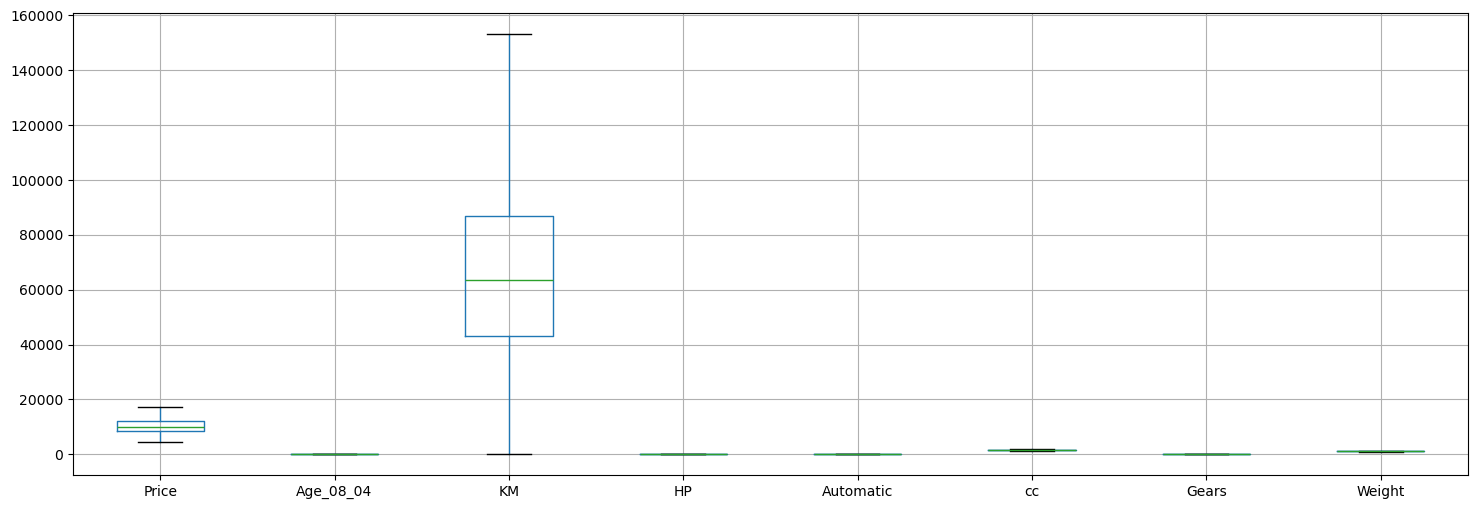

In [39]:
df.boxplot(figsize=(18,6))
plt.show()

In [40]:
# This custom function is designed to detect and handle outliers in a pandas DataFrame for a specified list of columns. It employs 
# the Interquartile Range (IQR) method for outlier detection and replaces outliers with either the upper or lower bounds calculated based on the IQR.

In [41]:
# Renaming column 
df.rename(columns={'Age_08_04':'Age'}, inplace=True)

In [42]:
df

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Gears,Weight
0,13500.0,23.0,46986.0,Diesel,90.0,0.0,1900.0,5.0,1152.5
1,13750.0,23.0,72937.0,Diesel,90.0,0.0,1900.0,5.0,1152.5
2,13950.0,24.0,41711.0,Diesel,90.0,0.0,1900.0,5.0,1152.5
3,14950.0,26.0,48000.0,Diesel,90.0,0.0,1900.0,5.0,1152.5
4,13750.0,30.0,38500.0,Diesel,90.0,0.0,1900.0,5.0,1152.5
...,...,...,...,...,...,...,...,...,...
1430,7500.0,69.0,20544.0,Petrol,86.0,0.0,1300.0,5.0,1025.0
1431,10845.0,72.0,19000.0,Petrol,86.0,0.0,1300.0,5.0,1015.0
1432,8500.0,71.0,17016.0,Petrol,86.0,0.0,1300.0,5.0,1015.0
1433,7250.0,70.0,16916.0,Petrol,86.0,0.0,1300.0,5.0,1015.0


In [43]:
# Now, let's check relationship of independent variables with the dependent variable using Scatter plots.

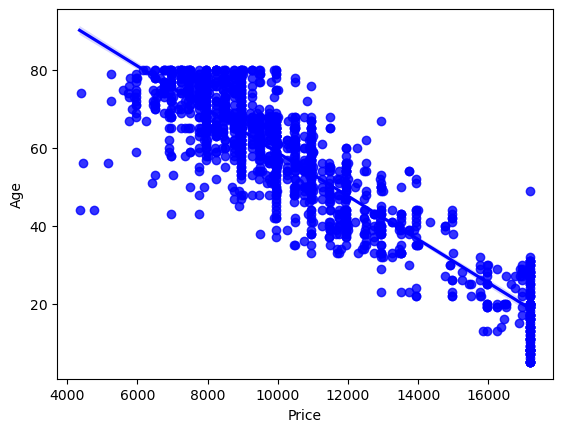

In [44]:
sns.regplot(x='Price',y='Age',data=df,color='blue')
plt.show()

In [45]:
# This plot shows negative linear correlation between Age and Price of Corolla.

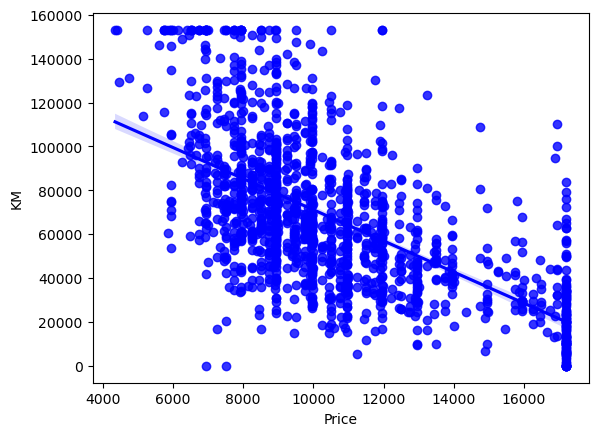

In [46]:
sns.regplot(x='Price',y='KM',data=df,color='blue')
plt.show()

In [47]:
# This plot shows negative linear correlation between KMs driven and Price of Corolla.

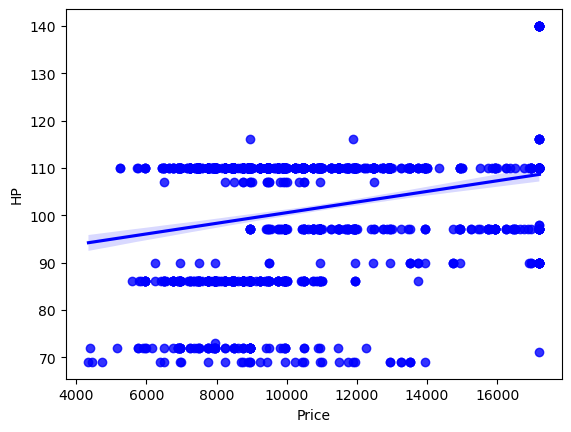

In [48]:
sns.regplot(x='Price',y='HP',data=df,color='blue')
plt.show()

In [49]:
# This shows a slightly positive linear correlation between 'HP' and 'Price', stating as HP increases price increases. 

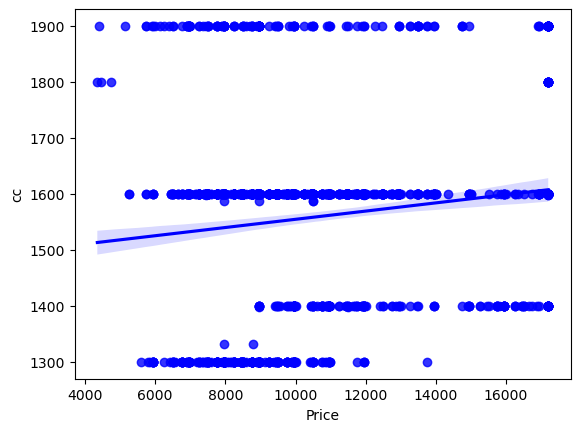

In [50]:
sns.regplot(x='Price',y='cc',data=df,color='blue')
plt.show()

In [51]:
# This shows fairly negligible correlation between 'cc' of car and 'Price'.

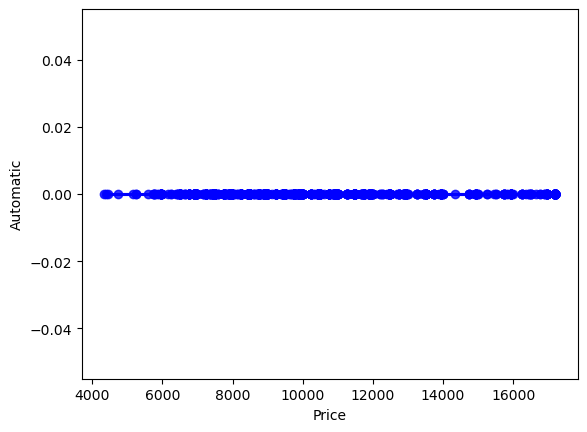

In [52]:
sns.regplot(x='Price',y='Automatic',data=df,color='blue')
plt.show()

In [53]:
# This shows no correlation if a car is Automatic or not with the 'Price'.

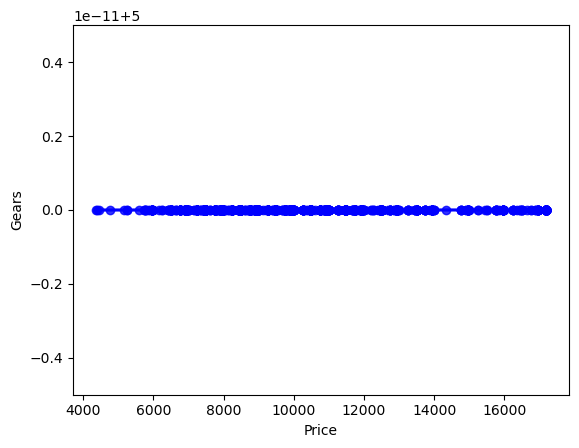

In [54]:
sns.regplot(x='Price',y='Gears',data=df,color='blue')
plt.show()

In [55]:
# This shows no correlation with how many gears a car has with the 'Price'.

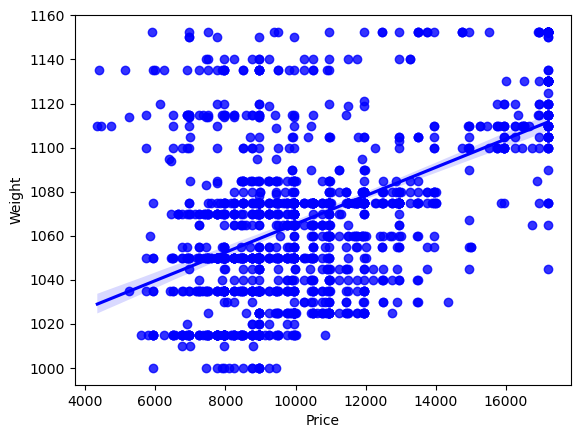

In [56]:
sns.regplot(x='Price',y='Weight',data=df,color='blue')
plt.show()

In [57]:
# This plot shows a slightly positive linear correlation between weight of car and price. 

In [58]:
# We can see that features like 'Automatic','Gears','cc' and 'Fuel type' have no significant effect on Price (Target Variable), 
# thus we will drop these columns for further analysis. 

In [59]:
df.drop(columns=['Automatic','cc','Gears','Fuel_Type'],inplace=True)

In [60]:
df

,Price,Age,KM,HP,Weight
0,13500.0,23.0,46986.0,90.0,1152.5
1,13750.0,23.0,72937.0,90.0,1152.5
2,13950.0,24.0,41711.0,90.0,1152.5
3,14950.0,26.0,48000.0,90.0,1152.5
4,13750.0,30.0,38500.0,90.0,1152.5
...,...,...,...,...,...
1430,7500.0,69.0,20544.0,86.0,1025.0
1431,10845.0,72.0,19000.0,86.0,1015.0
1432,8500.0,71.0,17016.0,86.0,1015.0
1433,7250.0,70.0,16916.0,86.0,1015.0


## Key EDA findings: - 

#### 1. No missing values in the dataset. 
#### 2. Only 1 duplicate record in the dataset which was removed. 
#### 3. All features had outliers which were treated using IQR method.
#### 4. Based on scatterplots, only features like 'Age','KM','HP','Weight' showed linear relationship with the target variable. All other features showed negligible or no linear relationship with the target variable 'Price' and thus were removed from the study.

## Model Building

In [62]:
# Building multiple linear regression model using 'statsmodels' library.

In [109]:
import statsmodels.formula.api as sfa

#### Model 1

In [112]:
# Building MLR model taking into consideration features like Age+KM+HP+Weight

In [114]:
model = sfa.ols('Price~Age+KM+HP+Weight',df).fit()

In [116]:
model.params

Intercept    604.508265
Age         -109.778682
KM            -0.018508
HP            20.436611
Weight        14.247894
dtype: float64

In [118]:
### INTERPRETATION: 

# Intercept: This is the predicted value of the dependent variable (Price) when all other independent variables (Age, KM, HP, Weight) are 0.

# Age: This coefficient indicates that, holding all other variables constant, a one-unit increase in Age is associated with a decrease of 109.78 
# in the dependent variable. This suggests a negative relationship between Age and the dependent variable. That is, older cars tend to have 
# lower prices.

# KM: This coefficient shows that for a one-unit increase in KM (kilometers driven), the dependent variable is expected to decrease by 0.0185, 
# assuming other variables are held constant. This indicates that higher mileage is associated with a lower price.

# HP: In contrast to the previous two, this coefficient is positive. It means that for a one-unit increase in HP (horsepower), the dependent variable
# is expected to increase by 20.44, keeping other variables constant. This suggests a positive relationship between HP and the dependent variable;
# cars with more horsepower tend to have higher values.

# Weight: This coefficient indicates that, with all other variables held constant, a one-unit increase in Weight is associated with an increase of
# 14.25 in the dependent variable. This implies a positive relationship between weight and the dependent variable.

In [120]:
model.pvalues

Intercept     5.776835e-01
Age          1.367332e-298
KM            3.042784e-55
HP            4.778459e-17
Weight        7.348506e-47
dtype: float64

In [122]:
# We can substantiate that all independent features have high significance level from p-values data

In [269]:
model.rsquared

0.8575002534647862

In [271]:
# R-squared value of 0.8575 suggests that the model is able to predict or explain 85.75% of the variation in the dependent variable. 
# The remaining percentage is attributed to factors that are not included in the model or random error.

#### Model 2

In [129]:
# Building MLR model taking into consideration features like Age+KM

In [131]:
model2 = sfa.ols('Price~Age+KM',df).fit()

In [133]:
model2.params

Intercept    18741.467238
Age           -128.108938
KM              -0.015853
dtype: float64

In [135]:
### INTERPRETATION: 

# Intercept (or Constant): This is the predicted value of the dependent variable (Price) when both Age and KM are 0. In this case, it's 18741.47.

# Age: This coefficient indicates that, holding kilometers driven (KM) constant, a one-unit increase in Age is associated with a decrease of 128.11
# in the dependent variable (Price).

# KM: This coefficient shows that for a one-unit increase in KM (kilometers driven), holding Age constant, the dependent variable (Price) is expected
# to decrease by 0.0159. 

In [137]:
model2.rsquared.round(2)

0.83

In [139]:
# R-squared value of 0.83 suggests that the model is able to predict or explain 83% of the variation in the dependent variable. 
# The remaining 17% is attributed to factors that are not included in the model or random error.

#### Model 3

In [141]:
# Building MLR model taking into consideration features like Age+HP+Weight

In [143]:
model3 = sfa.ols('Price~Age+HP+Weight',df).fit()

In [145]:
model3.params

Intercept    5109.978306
Age          -132.262708
HP             32.833471
Weight          8.865000
dtype: float64

In [147]:
### INTERPRETATION: 

# Intercept (or Constant): This is the predicted value of the dependent variable (Price) when all other independent variables (Age, HP, and Weight) 
# are 0. In this specific case, it's 5109.98. 

# Age: This coefficient indicates that, holding horsepower (HP) and weight constant, a one-unit increase in Age is associated with a decrease of 132.26 
# in the dependent variable.

# HP: This coefficient is positive, meaning that for a one-unit increase in HP (horsepower), holding Age and Weight constant, the dependent variable
# is expected to increase by 32.83. 

# Weight: This coefficient indicates that with all other variables held constant, a one-unit increase in Weight is associated with an increase of 8.87 
# in the dependent variable.

In [151]:
model3.rsquared.round(2)

0.83

In [153]:
# R-squared value of 0.83 suggests that the model is able to predict or explain 83% of the variation in the dependent variable. 
# The remaining 17% is attributed to factors that are not included in the model or random error.

In [273]:
### CONCLUSION: 

# On basis of r-squared value, we select 'Model 1' which gives the highest r-squared value of 0.8575.

## Model Evaluation

#### Using Residual Plot -> Identify non-linearity,heteroscedasticity and outliers

In [159]:
df.head()

,Price,Age,KM,HP,Weight
0,13500.0,23.0,46986.0,90.0,1152.5
1,13750.0,23.0,72937.0,90.0,1152.5
2,13950.0,24.0,41711.0,90.0,1152.5
3,14950.0,26.0,48000.0,90.0,1152.5
4,13750.0,30.0,38500.0,90.0,1152.5


In [279]:
# Using the best model -> 'Model 1' from above for evaluation

In [163]:
#Predict values for 'Price'
model.fittedvalues

0       15469.979176
1       14989.680927
2       15457.829613
3       15121.876130
4       14858.586356
            ...     
1430     9011.192559
1431     8567.953760
1432     8714.452096
1433     8826.081567
1434    10381.490561
Length: 1435, dtype: float64

In [165]:
model.resid # model.resid = (model.fittedvalues - 'Price' values)

0      -1969.979176
1      -1239.680927
2      -1507.829613
3       -171.876130
4      -1108.586356
           ...     
1430   -1511.192559
1431    2277.046240
1432    -214.452096
1433   -1576.081567
1434   -3431.490561
Length: 1435, dtype: float64

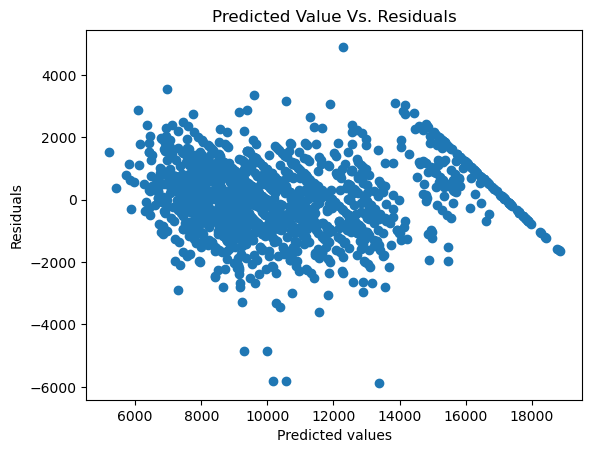

In [167]:
plt.scatter(x=model.fittedvalues,y=model.resid)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Predicted Value Vs. Residuals')
plt.show()

In [289]:
# From the above residual plot we can concur: 

# 1. Randomness: The residuals are randomly scattered around the horizontal axis (zero line) with no discernible pattern. This indicates that 
#    the model is capturing the underlying relationship between the variables well.

# 2. Constant Variance (Homoscedasticity): The spread of the residuals are roughly constant across the range of predicted values or the 
#    independent variable. This indicates that the model's assumptions about the variance of the errors are significantly met.

# 3. Also, we don't see any U-shaped curve or funnel shaped pattern in the data (U-shaped or funnel shaped pattern indicates non-linearity)

# CONCLUSION: 
# On basis of Residual plot we can say that our model ('Model 1') is a good fit. 

## Lasso-Ridge

In [294]:
# Now for using Lasso-Ridge regularization method on the same dataset, we need to build separate models using Lasso and Ridge regularization method
# because of the following reasons: - 

# 1. Regularization is part of the model: Lasso and Ridge regression are not post-processing steps. The regularization penalties 
#    (L1 for Lasso, L2 for Ridge) are incorporated directly into the model's loss function during training. This influences the way coefficients are 
#    estimated, leading to different model characteristics.

# 2. Hyperparameter Tuning: Lasso and Ridge have hyperparameters (alpha for both) that control the strength of regularization. These need to be 
#    carefully tuned to find the optimal balance between model complexity and performance.

# 3. Feature Selection: Lasso regression, due to its L1 penalty, can shrink some coefficients to exactly zero. This effectively performs 
#    feature selection, making it useful for identifying the most important predictors.

In [215]:
# Checking results using Lasso & Ridge regularization methods for the same Toyota Corolla dataset.

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [223]:
corolla_data=pd.read_csv('ToyotaCorolla - MLR.csv')
corolla_data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [225]:
# Removing unnecessary features from the dataset as was determined in the earlier EDA process.

In [227]:
corolla_data.drop_duplicates(inplace=True)
corolla_data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [229]:
corolla_data.drop(columns=['Fuel_Type','Automatic','cc','Doors','Cylinders','Gears'],inplace=True)
corolla_data

,Price,Age_08_04,KM,HP,Weight
0,13500,23,46986,90,1165
1,13750,23,72937,90,1165
2,13950,24,41711,90,1165
3,14950,26,48000,90,1165
4,13750,30,38500,90,1170
...,...,...,...,...,...
1431,7500,69,20544,86,1025
1432,10845,72,19000,86,1015
1433,8500,71,17016,86,1015
1434,7250,70,16916,86,1015


In [231]:
# Building a regression model

In [233]:
X = corolla_data.drop('Price',axis=1) #I/P
Y = corolla_data[['Price']] #O/P

In [235]:
X

,Age_08_04,KM,HP,Weight
0,23,46986,90,1165
1,23,72937,90,1165
2,24,41711,90,1165
3,26,48000,90,1165
4,30,38500,90,1170
...,...,...,...,...
1431,69,20544,86,1025
1432,72,19000,86,1015
1433,71,17016,86,1015
1434,70,16916,86,1015


In [237]:
Y

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1431,7500
1432,10845
1433,8500
1434,7250


In [239]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20)

In [241]:
(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

((1148, 4), (1148, 1), (287, 4), (287, 1))

In [243]:
from sklearn.linear_model import Lasso, Ridge
lasso_model = Lasso(alpha=1.0)  # Initialize with a regularization strength (alpha)
ridge_model = Ridge(alpha=1.0) 
lasso_model.fit(x_train, y_train)

Lasso()

In [245]:
ridge_model.fit(x_train, y_train)

Ridge()

In [247]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]} 
lasso_grid = GridSearchCV(lasso_model, param_grid, cv=5)  # 5-fold cross-validation
lasso_grid.fit(x_train, y_train)
best_lasso_alpha = lasso_grid.best_params_['alpha']
best_lasso_alpha

10.0

In [249]:
from sklearn.metrics import mean_squared_error, r2_score
lasso_pred = lasso_grid.predict(x_test)  # Predictions from the best Lasso model

In [251]:
mse_lasso = mean_squared_error(y_test, lasso_pred)
r2_lasso = r2_score(y_test, lasso_pred)
print(mse_lasso)
print(r2_lasso)

1988557.6572712173
0.8641909168089942


In [253]:
ridge_grid = GridSearchCV(ridge_model, param_grid, cv=5)  # 5-fold cross-validation
ridge_grid.fit(x_train, y_train)
best_ridge_alpha = ridge_grid.best_params_['alpha']
best_ridge_alpha

10.0

In [255]:
ridge_pred = ridge_grid.predict(x_test)

In [257]:
mse_ridge = mean_squared_error(y_test, ridge_pred)
r2_ridge = r2_score(y_test, ridge_pred)
print(mse_ridge)
print(r2_ridge)

1988571.4650929058
0.8641899738000764


In [282]:
# An R2 score of 0.8641 in both Lasso & Ridge models indicates that 86.41% of the variance in the dependent variable is explained by 
# the independent variables in the models.

# We can concur that both models are doing a good job of capturing the relationship between the features and the target variable.

In [284]:
# Both Lasso and Ridge aim to minimize the MSE while constraining the size of the coefficients.

# By adding a penalty term to the loss function, Lasso and Ridge find a balance between model complexity 
# (number of features, size of coefficients) and goodness of fit (MSE).

# A larger penalty in either Lasso or Ridge results in smaller coefficients. Often, this will also increase MSE on the training data 
# since we are restricting the model's prediction power.

## FINAL OUTCOME: - 

#### 1.  R-squared value after Lasso-Ridge regularization: 0.8641
#### 2.  R-squared value for Multiple Linear Regression (MLR) model: 0.8575

## KEY TAKE-AWAYS: - 

#### 1. In this case, the Lasso-Ridge regularization appears to have slightly improved the model's fit to the data, as evidenced by the higher R-squared value.

#### 2. The improved R-squared suggests that the regularization might have helped in reducing overfitting and improving the model's ability to generalize to unseen data.

#### 3. Lasso model appears to be performing slightly better than Ridge Model based on Mean Square Error values. The difference in MSE is relatively small, but it suggests that Lasso model is making predictions that are closer to the true values. 